## Manual Neural Network

This is a demostration of simple Articial Neural Networks (ANN) without any special packages like TensorFlow. Here a simple ANN compoments are build manually for the purpose of understanding.

### Operation Classes
* Input Nodes
* Output Nodes
* Global Default Graph Variable
* Compute
    * Overwritten by extended classes

In [1]:
import numpy as np

In [2]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            print(node)
            self.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass
    

In [3]:
class add(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [4]:
class multiply(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [5]:
class matrixMultiply(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

### Variables, Placeholders & Graphs Classes

* Placeholder - An Empty Node to hold output value.
* Variables - Changeable parameter of Graph
* Graph - Global Variable connecting variables & placeholders to Operations

In [6]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [7]:
class Variable():
    
    def __init__(self, init_val=None):
        
        self.value = init_val
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [8]:
# Graph class is basically connecting variables and placeholders into operations they belong to..
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

Lets try to create a Graph to implement the following now.

z = Wx + b

here W = 10, b = 1 and x - placeholder

In [9]:
# Create a Graph function and initialize it.
g = Graph()
g.set_as_default()

In [10]:
W = Variable(10)
b = Variable(1)

In [11]:
x = Placeholder()

In [12]:
y = multiply(W, x) 
z = add(y, b)

Now that the Graph has all the nodes, we need to execute all the operations within a Session. Use PostOrder Tree Traversal to execute the nodes in the correct order

In [13]:
def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            print("traverse :: ", node.input_nodes)
            for input_node in node.input_nodes:
                recurse(input_node)
                
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

### Session Class 

Create a class with function run which takes operation and feed dictionary. A feed dictionary in TensorFlow is a dictionary mapping placeholders into input values. In other words placeholders are given with values with the help of feed dictionary. During the batch update of the network, all the placeholders will be given values using feed dictionary.

In [14]:
class Session():
    
    def run(self, operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            print("processing node :: ", node, type(node))
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:  # It is an operation
                print("input_nodes :: ", node.input_nodes)
                node.inputs = [input_node.output for input_node in node.input_nodes]
                # The * mark below indicates giving inputs without knowing their actual count
                node.output = node.compute(*node.inputs) # args
                
            print("output :: ", node.output)
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output
                

In [15]:
sess = Session()
result = sess.run(operation=z, feed_dict={x:100})
result

traverse ::  [<__main__.multiply object at 0x10d8c4670>, <__main__.Variable object at 0x10d8aa340>]
traverse ::  [<__main__.Variable object at 0x10d897d60>, <__main__.Placeholder object at 0x10d897130>]
processing node ::  <__main__.Variable object at 0x10d897d60> <class '__main__.Variable'>
output ::  10
processing node ::  <__main__.Placeholder object at 0x10d897130> <class '__main__.Placeholder'>
output ::  100
processing node ::  <__main__.multiply object at 0x10d8c4670> <class '__main__.multiply'>
input_nodes ::  [<__main__.Variable object at 0x10d897d60>, <__main__.Placeholder object at 0x10d897130>]
output ::  1000
processing node ::  <__main__.Variable object at 0x10d8aa340> <class '__main__.Variable'>
output ::  1
processing node ::  <__main__.add object at 0x10d8aa6d0> <class '__main__.add'>
input_nodes ::  [<__main__.multiply object at 0x10d8c4670>, <__main__.Variable object at 0x10d8aa340>]
output ::  1001


1001

In [16]:
g = Graph()
g.set_as_default()

W = Variable(np.array([10,20,30,40]).reshape(2,2))
b = Variable(np.array([1,2,]))

x = Placeholder()
y = matrixMultiply(W,x)
z = add(y, b)

sess = Session()
result = sess.run(operation=z, feed_dict={x:10})
result

traverse ::  [<__main__.matrixMultiply object at 0x10d8cc130>, <__main__.Variable object at 0x10d8aabb0>]
traverse ::  [<__main__.Variable object at 0x10d8c4e80>, <__main__.Placeholder object at 0x10d8cc070>]
processing node ::  <__main__.Variable object at 0x10d8c4e80> <class '__main__.Variable'>
output ::  [[10 20]
 [30 40]]
processing node ::  <__main__.Placeholder object at 0x10d8cc070> <class '__main__.Placeholder'>
output ::  10
processing node ::  <__main__.matrixMultiply object at 0x10d8cc130> <class '__main__.matrixMultiply'>
input_nodes ::  [<__main__.Variable object at 0x10d8c4e80>, <__main__.Placeholder object at 0x10d8cc070>]
output ::  [[100 200]
 [300 400]]
processing node ::  <__main__.Variable object at 0x10d8aabb0> <class '__main__.Variable'>
output ::  [1 2]
processing node ::  <__main__.add object at 0x10d8cc0d0> <class '__main__.add'>
input_nodes ::  [<__main__.matrixMultiply object at 0x10d8cc130>, <__main__.Variable object at 0x10d8aabb0>]
output ::  [[101 202]
 

array([[101, 202],
       [301, 402]])

# Classification Problem

## Activation Function

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

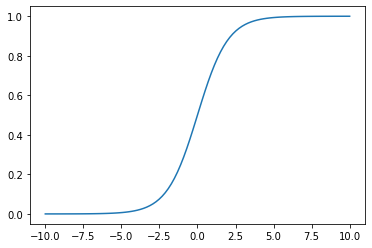

In [19]:
# Lets plot a sigmoid function
sample = np.linspace(-10, 10, 100)
plt.plot(sample, sigmoid(sample))

In [46]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        
        super().__init__([z])
        
    def compute(self, z_var):
        return 1 / (1 + np.exp(-z_var))

In [21]:
from sklearn.datasets import make_blobs

In [22]:
data = make_blobs(n_samples = 50, n_features = 2, centers=2, random_state=75)
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [23]:
features = data[0]
labels = data[1]

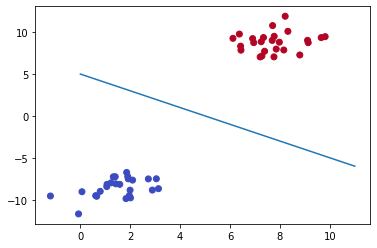

In [24]:
x = np.linspace(0, 11, 10)
y = -x + 5
plt.scatter(features[:,0], features[:,1], c=labels, cmap="coolwarm")
plt.plot(x, y)
plt.show()

In the above plot, blue line separates both the clusters perfect. Essentially the x and y of the blue lines are nothing but the features of the input bolb. x = f1, y = f2.

Now, lets try to convert the line equaltion into matrix form.

y = mx + b

y = -1x + 5

f2 = -f1 + 5 [ x = f1; y = f2 ]

f2 + f1 - 5 = 0

here, f1 and f2 are columns of the input

The matrix form of f2 + f1 => FeatMatrix * [1,1] and

f2 + f1 - 5 = 0  ==> FeatMatrix * [1,1] - 5 = 0; * - is dot product here

In [42]:
# Checking purpose
f = np.array([1,2,3,4,5,6]).reshape(3,2)
print(f)
f.dot(np.array([1,1])) - 5

[[1 2]
 [3 4]
 [5 6]]


array([-2,  2,  6])

In [43]:
print(features.shape)

(50, 2)


In [51]:
# Letz try to build above equation in Graph 

g = Graph()
g.set_as_default()

x = Placeholder() #Feature Matrix
weight = Variable([1,1])
bias = Variable(-5)

# Fit into Equation
y = matrixMultiply(weight, x)
z = add(y, bias)

# Pass thru Sigmoid function
s = Sigmoid(z)

sess = Session()
result = sess.run(operation=s, feed_dict={x:features[1,:]})
result

traverse ::  [<__main__.add object at 0x128a61df0>]
traverse ::  [<__main__.matrixMultiply object at 0x128a61c40>, <__main__.Variable object at 0x128a61940>]
traverse ::  [<__main__.Variable object at 0x128a5e640>, <__main__.Placeholder object at 0x128b8d1f0>]
processing node ::  <__main__.Variable object at 0x128a5e640> <class '__main__.Variable'>
output ::  [1, 1]
processing node ::  <__main__.Placeholder object at 0x128b8d1f0> <class '__main__.Placeholder'>
output ::  [9.13332743 8.74906102]
processing node ::  <__main__.matrixMultiply object at 0x128a61c40> <class '__main__.matrixMultiply'>
input_nodes ::  [<__main__.Variable object at 0x128a5e640>, <__main__.Placeholder object at 0x128b8d1f0>]
output ::  17.882388443041556
processing node ::  <__main__.Variable object at 0x128a61940> <class '__main__.Variable'>
output ::  -5
processing node ::  <__main__.add object at 0x128a61df0> <class '__main__.add'>
input_nodes ::  [<__main__.matrixMultiply object at 0x128a61c40>, <__main__.Va

0.9999974575718917